# Intelligent Systems
## HW6
### Reza Jahani / 810198377

# Question 1) Model Based Reinforcement Learning - Analytical

* Available in the report.

# Question 2) Model Based Reinforcement Learning Implementation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

In [19]:
global theta
global discount_factor
theta = 1e-4
discount_factor = 1

# This function is employed to calculate the maximum value for a state and optimal action
def Q_star(state,values,rewards,p):
    actions = range(1,min(state,100-state)+1)
    action_values = []
    for i in range(len(actions)):
        action_val = p*(rewards[state+actions[i]]+discount_factor*values[state+actions[i]]) + (1-p)*(rewards[state-actions[i]]+discount_factor*values[state-actions[i]])
        action_values.append(action_val)
    V = np.max(action_values)
    a = np.argmax(action_values) + 1
    return V,a

# This function is used to calculate the optimal value for states
def State_Values(p):
    rewards = np.zeros(101)
    rewards[100] = 1
    values = np.zeros(101)
    states = np.arange(1,100)

    while True:
        delta = 0
        for i in range(len(states)):
            V,_ = Q_star(states[i],values,rewards,p)
            delta = max(delta,np.abs(values[i+1]-V))
            values[i+1] = V
        if delta < theta:
            break

    return values

# This function uses the values of the states to find the optimal policy
def Policy_Finder(values,p):
    rewards = np.zeros(101)
    rewards[100] = 1
    Optimal_Actions = []
    states = range(1,100)
    for i in range(len(states)):
        _,a = Q_star(states[i],values,rewards,p)
        Optimal_Actions.append(a)
    return Optimal_Actions

# General module for value iteration algorithm on this problem
def Module(p):
    values = State_Values(p)
    policy = Policy_Finder(values,p)
    return policy,values

In [20]:
p = 0.25
policy,values = Module(p)

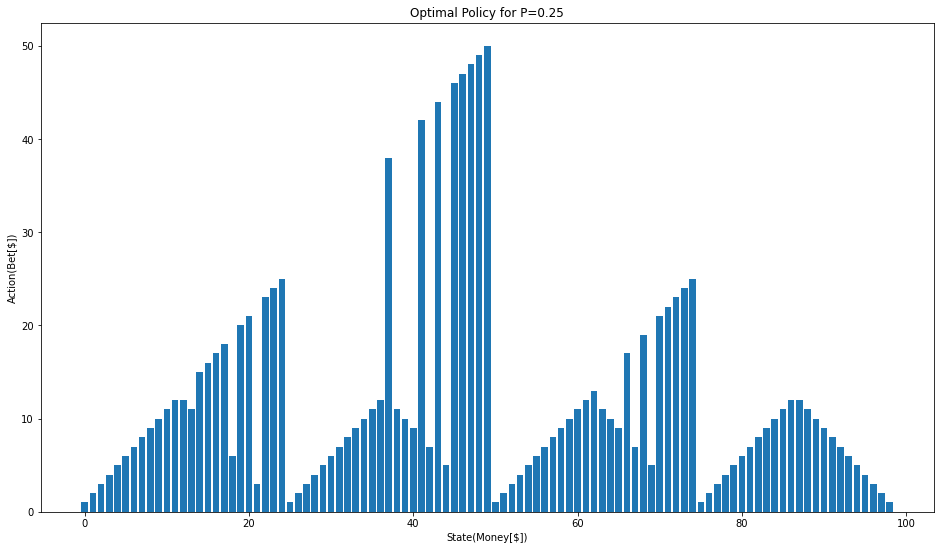

In [21]:
plt.figure(figsize=(16,9))
plt.bar(range(len(policy)),policy)
plt.xlabel('State(Money[$])')
plt.ylabel('Action(Bet[$])')
plt.title(f'Optimal Policy for P={p}')
plt.show()

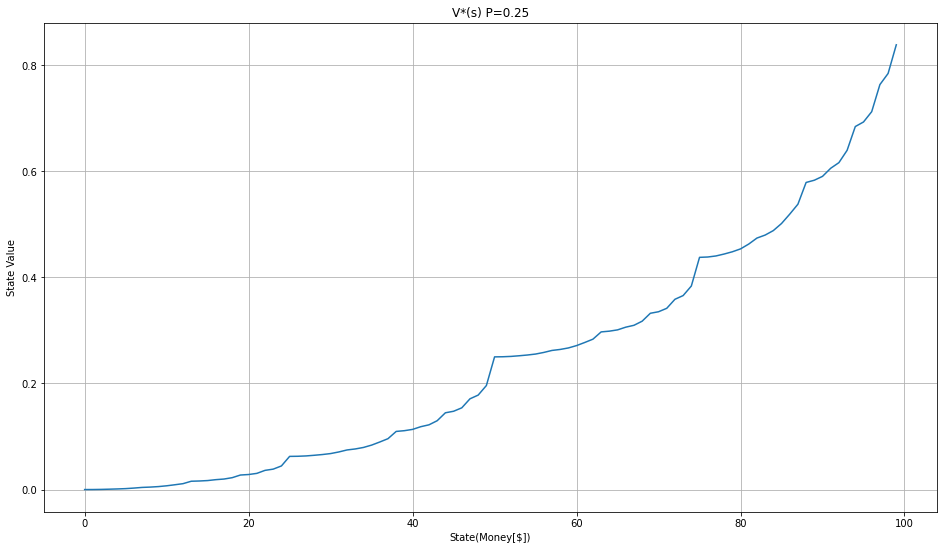

In [22]:
plt.figure(figsize=(16,9))
plt.plot(range(len(values)-1),values[:len(values)-1])
plt.xlabel('State(Money[$])')
plt.ylabel('State Value')
plt.title(f'V*(s) P={p}')
plt.grid()
plt.show()

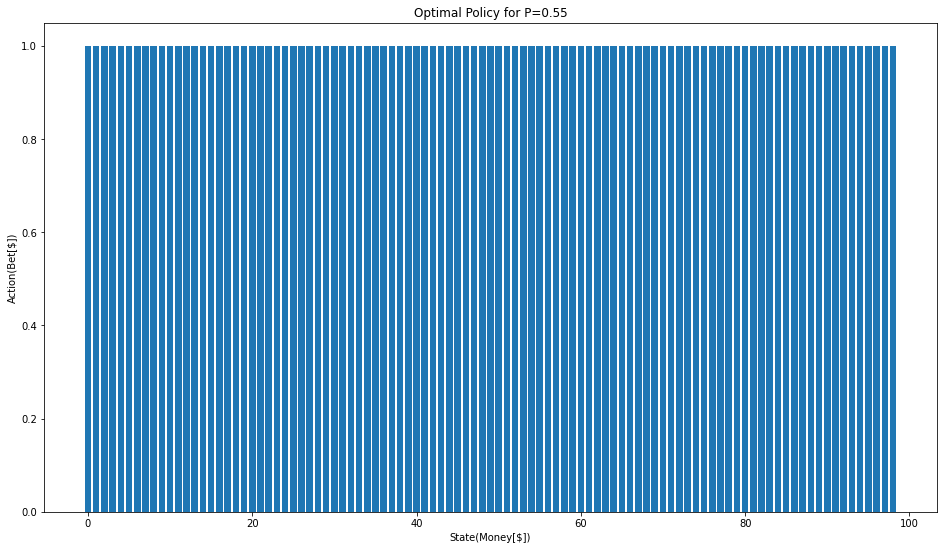

In [23]:
p = 0.55
policy,values = Module(p)

plt.figure(figsize=(16,9))
plt.bar(range(len(policy)),policy)
plt.xlabel('State(Money[$])')
plt.ylabel('Action(Bet[$])')
plt.title(f'Optimal Policy for P={p}')
plt.show()

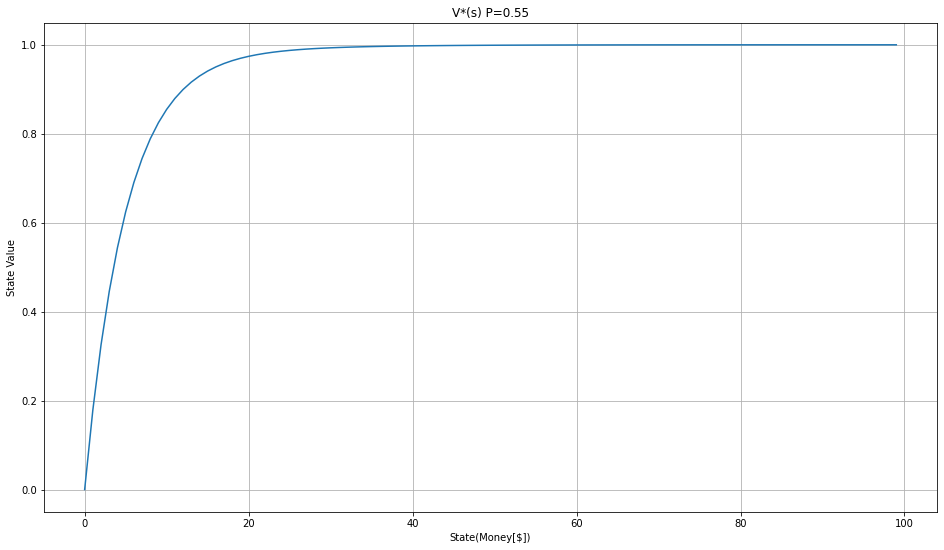

In [24]:
plt.figure(figsize=(16,9))
plt.plot(range(len(values)-1),values[:len(values)-1])
plt.xlabel('State(Money[$])')
plt.ylabel('State Value')
plt.title(f'V*(s) P={p}')
plt.grid()
plt.show()

# Question 3) Model Free Reinforcement Learning - Implementation

## Section 1) Solving without Q-Learning & Random Based Progress

In [25]:
from IPython.display import clear_output
from os import system
from time import sleep
import gym

In [27]:
env = gym.make("Taxi-v3").env

In [30]:
env.reset()
print(env.render(mode='ansi'))

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+




In [31]:
Accumulated_Reward = 0
Steps = 0
info = {'states':[],'Accumulated Reward':[],'instant reward':[],'Display':[]}
while True:
    action = env.action_space.sample()                      # Generate random action
    state, reward, done, _ = env.step(action)               # Take the action
    Accumulated_Reward = Accumulated_Reward + reward        # Add the reward
    Steps = Steps + 1                                       # Increament number of steps
    info['Display'].append(env.render(mode='ansi'))         # Add the information of agent in that state
    info['states'].append(state)
    info['Accumulated Reward'].append(Accumulated_Reward)
    info['instant reward'].append(reward)
    if done == 1:                                           # Check if the process is over
        break

In [32]:
print(f"Number of Steps: {Steps}")
print(f"Accumulated Return: {Accumulated_Reward}")

Number of Steps: 461
Accumulated Return: -1754


In [33]:
for i in range(Steps):
    clear_output(wait=True)
    print(f"Step {i+1}")
    print(info['Display'][i])
    print(f"State: {info['states'][i]}")
    print(f"Instant Reward: {info['instant reward'][i]}")
    print(f"Accumulated Reward: {info['Accumulated Reward'][i]}")
    sleep(0.005)

Step 461
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

State: 0
Instant Reward: 20
Accumulated Reward: -1754


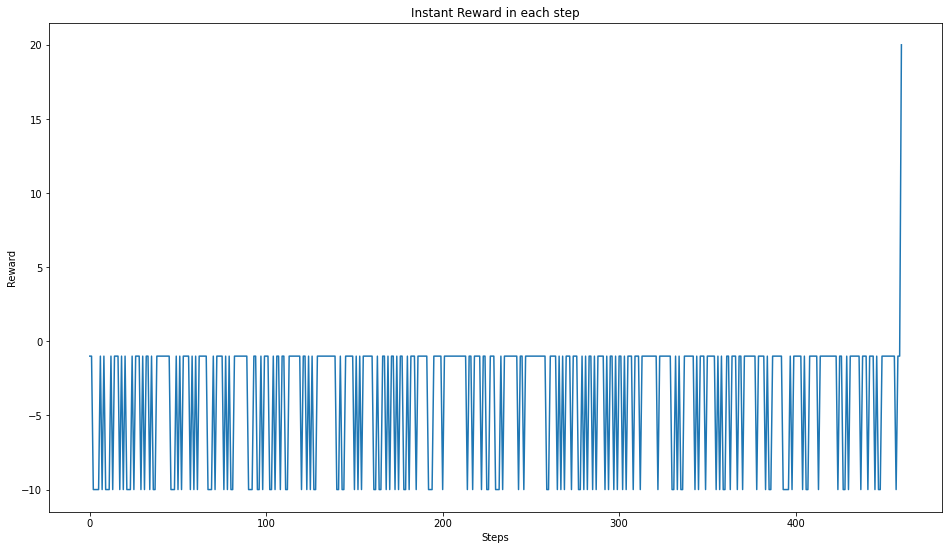

In [34]:
plt.figure(figsize=(16,9))
plt.plot(range(Steps),info['instant reward'])
plt.xlabel('Steps')
plt.ylabel('Reward')
plt.title("Instant Reward in each step")
plt.show()

Now let's perform the algorithm in more episodes.

In [45]:
episodes = 1000

In [46]:
Num_Steps = []
Accumulated_Reward_total = []
for i in range(episodes):
    env.reset()
    Accumulated_Reward = 0
    Steps = 0
    done = 0
    while True:
        action = env.action_space.sample()                      # Generate random action
        state, reward, done, _ = env.step(action)               # Take the action
        Accumulated_Reward = Accumulated_Reward + reward        # Add the reward
        Steps = Steps + 1
        if done == 1:                                           # Check if the process is over
            break
    
    Num_Steps.append(Steps)
    Accumulated_Reward_total.append(Accumulated_Reward)

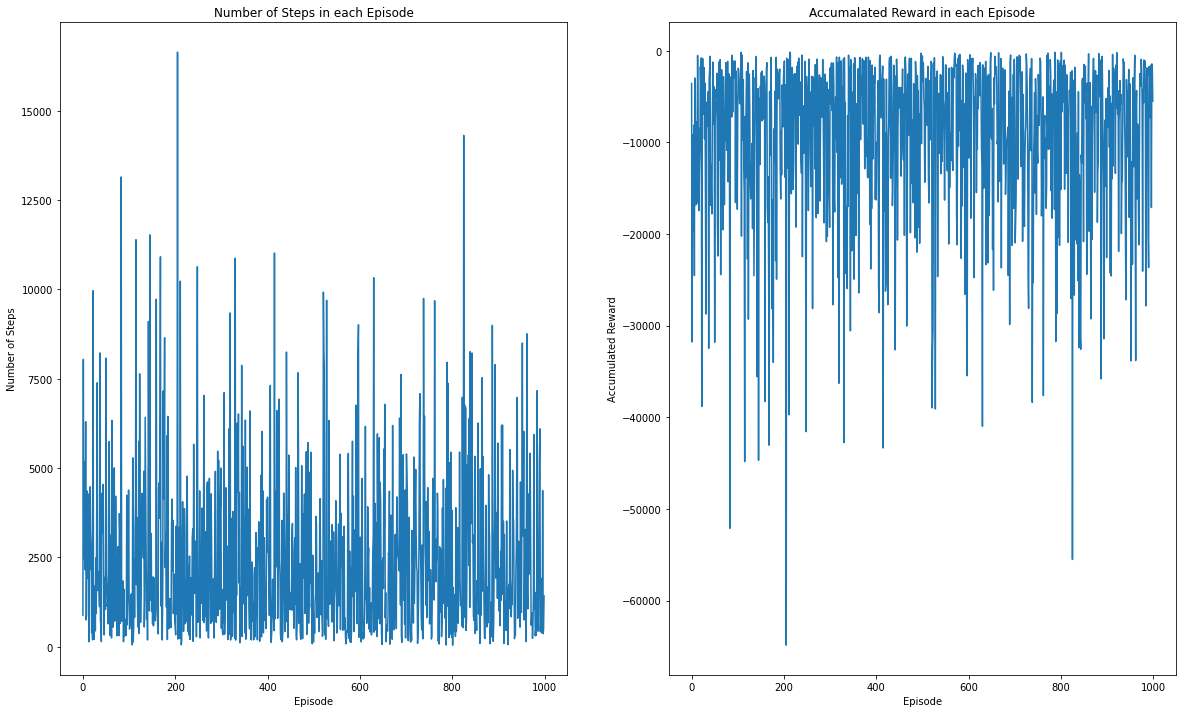

In [47]:
plt.figure(figsize=(20,12))
plt.subplot(121)
plt.plot(range(episodes),Num_Steps)
plt.xlabel('Episode')
plt.ylabel('Number of Steps')
plt.title("Number of Steps in each Episode")
plt.subplot(122)
plt.plot(range(episodes),Accumulated_Reward_total)
plt.xlabel('Episode')
plt.ylabel('Accumulated Reward')
plt.title("Accumalated Reward in each Episode")
plt.show()

## Section 2) Solving with Q-Learning & Intelligent Progress

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from IPython.display import clear_output
from os import system
from time import sleep
import gym

In [3]:
env = gym.make("Taxi-v3").env

In [4]:
print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

Action Space Discrete(6)
State Space Discrete(500)


In [5]:
num_action = 6
num_state = 500
num_episodes = 2000
epsilon = 0.1
alpha = 0.1
discount_factor = 0.8

In [6]:
Q_Table = np.zeros((num_state,num_action))

In [7]:
Num_Steps = []
Reward_total = []
for i in range(num_episodes):
    env.reset()
    ps = env.s
    step = 0
    Reward_ = 0
    while True:
        if np.random.uniform(0,1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q_Table[ps,:])

        ns, reward, done, _ = env.step(action)
        Reward_ = Reward_ + reward
        step = step + 1

        if done==1:
            break

        Q_Table[ps,action] = Q_Table[ps,action] + alpha*(reward + discount_factor*np.max(Q_Table[ns,:]) - Q_Table[ps,action])
        ps = ns

    Num_Steps.append(step)
    Reward_total.append(Reward_)

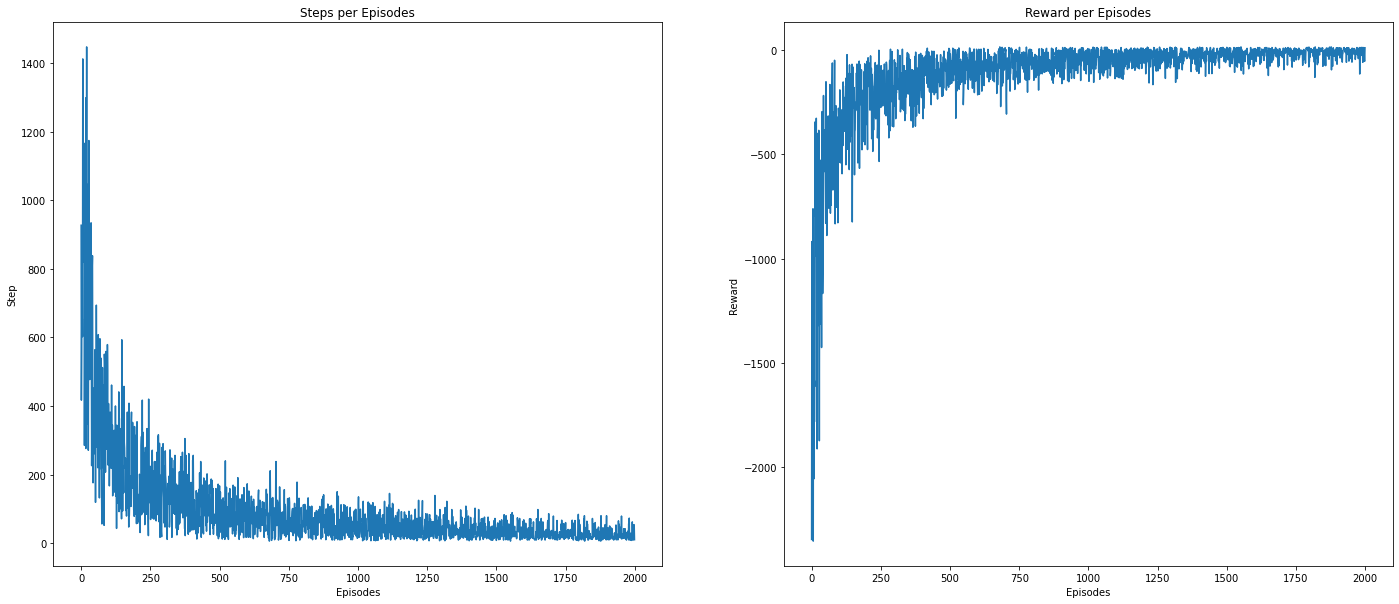

In [8]:
plt.figure(figsize=(24,10))
plt.subplot(121)
plt.plot(range(num_episodes),Num_Steps)
plt.xlabel('Episodes')
plt.ylabel('Step')
plt.title('Steps per Episodes')
plt.subplot(122)
plt.plot(range(num_episodes),Reward_total)
plt.xlabel('Episodes')
plt.ylabel('Reward')
plt.title('Reward per Episodes')
plt.show()

Test Time!!!!

In [10]:
env.reset()
print(env.render(mode='ansi'))

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+




In [11]:
test_step = 0
test_reward = 0
state = env.s
info = {'states':[],'Accumulated Reward':[],'instant reward':[],'Display':[]}
while True:
    action = np.argmax(Q_Table[state,:])
    state, reward, done, _ = env.step(action)
    test_step = test_step + 1
    test_reward = test_reward + reward
    info['Display'].append(env.render(mode='ansi'))         # Add the information of agent in that state
    info['states'].append(state)
    info['Accumulated Reward'].append(test_reward)
    info['instant reward'].append(reward)
    if done==1:
        break

In [14]:
print(f"Number of steps: {test_step}")
print(f"Accuired reward by the agent: {test_reward}")

Number of steps: 10
Accuired reward by the agent: 11


In [18]:
for i in range(test_step):
    clear_output(wait=True)
    print(f"Step {i+1}")
    print(info['Display'][i])
    print(f"State: {info['states'][i]}")
    print(f"Instant Reward: {info['instant reward'][i]}")
    print(f"Accumulated Reward: {info['Accumulated Reward'][i]}")
    sleep(1)

Step 10
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

State: 410
Instant Reward: 20
Accumulated Reward: 11


In [17]:
for i in range(test_step):
    print("-------------")
    print(f"Step {i+1}")
    print(info['Display'][i])
    print(f"State: {info['states'][i]}")
    print(f"Instant Reward: {info['instant reward'][i]}")
    print(f"Accumulated Reward: {info['Accumulated Reward'][i]}")

-------------
Step 1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

State: 222
Instant Reward: -1
Accumulated Reward: -1
-------------
Step 2
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

State: 122
Instant Reward: -1
Accumulated Reward: -2
-------------
Step 3
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

State: 22
Instant Reward: -1
Accumulated Reward: -3
-------------
Step 4
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

State: 2
Instant Reward: -1
Accumulated Reward: -4
-------------
Step 5
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)

State: 18
Instant Reward: -1
Accumulated Reward: -5
-------------
Step 6
+---------+
|R: | : :G|
|_: | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

State: 118
Instant Reward: -1
Accumulated Re